In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
# load in clean and tidy data and create workfile
df = pd.read_csv("health_ineq_online_table_1.csv")

In [3]:
df

,gnd,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,7098335,4.327821e+02,3.833254e+02,78.52628,78.78384,0.052538,0.062370
1,F,2,7120033,1.919116e+03,1.681780e+03,80.29138,80.46241,0.056187,0.064146
2,F,3,7131115,3.718216e+03,3.344087e+03,81.04365,81.16810,0.056927,0.065437
3,F,4,7135812,5.466639e+03,5.051834e+03,81.43418,81.53068,0.058089,0.065256
4,F,5,7140055,7.089429e+03,6.671779e+03,81.54852,81.62885,0.058225,0.064854
...,...,...,...,...,...,...,...,...,...
195,M,96,6953071,2.570520e+05,2.249077e+05,86.21402,86.32386,0.075620,0.084606
196,M,97,6954378,2.972074e+05,2.557433e+05,86.40608,86.52405,0.077477,0.084408
197,M,98,6956188,3.654243e+05,3.064940e+05,86.64326,86.77003,0.078087,0.085943
198,M,99,6956929,5.116917e+05,4.125774e+05,86.77115,86.91302,0.074041,0.080363


In [4]:
df.describe()

,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,50.500000,7.041436e+06,9.771184e+04,8.801818e+04,83.046589,83.092706,0.069580,0.074298
std,28.938507,1.463053e+05,2.015357e+05,1.549355e+05,3.373378,3.330028,0.009055,0.012146
min,1.000000,6.767752e+06,3.562361e+02,2.841466e+02,72.374810,72.742780,0.042176,0.052039
25%,25.750000,6.910875e+06,3.072709e+04,2.867067e+04,81.313312,81.415612,0.063896,0.066256
50%,50.500000,7.028468e+06,6.047663e+04,5.771530e+04,83.510525,83.643190,0.071840,0.073425
75%,75.250000,7.186135e+06,1.034540e+05,9.973633e+04,85.550840,85.569468,0.076347,0.082272
max,100.000000,7.217115e+06,1.982300e+06,1.532601e+06,88.913250,88.874840,0.083568,0.103408


In [5]:
df.columns

Index(['gnd', 'pctile', 'count', 'hh_inc', 'hh_inc_age40', 'le_agg',
       'le_raceadj', 'sd_le_agg', 'sd_le_raceadj'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gnd            200 non-null    object 
 1   pctile         200 non-null    int64  
 2   count          200 non-null    int64  
 3   hh_inc         200 non-null    float64
 4   hh_inc_age40   200 non-null    float64
 5   le_agg         200 non-null    float64
 6   le_raceadj     200 non-null    float64
 7   sd_le_agg      200 non-null    float64
 8   sd_le_raceadj  200 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 14.2+ KB


In [7]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['pctile', 'count', 'hh_inc', 'hh_inc_age40', 'le_agg', 'le_raceadj', 'sd_le_agg', 'sd_le_raceadj']


In [8]:
# view the numerical variables
df[numerical].head()

,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,1,7098335,432.7821,383.3254,78.52628,78.78384,0.052538,0.062370
1,2,7120033,1919.1160,1681.7800,80.29138,80.46241,0.056187,0.064146
2,3,7131115,3718.2160,3344.0870,81.04365,81.16810,0.056927,0.065437
3,4,7135812,5466.6390,5051.8340,81.43418,81.53068,0.058089,0.065256
4,5,7140055,7089.4290,6671.7790,81.54852,81.62885,0.058225,0.064854


In [9]:
df_num = df[numerical]
df_num

,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,1,7098335,4.327821e+02,3.833254e+02,78.52628,78.78384,0.052538,0.062370
1,2,7120033,1.919116e+03,1.681780e+03,80.29138,80.46241,0.056187,0.064146
2,3,7131115,3.718216e+03,3.344087e+03,81.04365,81.16810,0.056927,0.065437
3,4,7135812,5.466639e+03,5.051834e+03,81.43418,81.53068,0.058089,0.065256
4,5,7140055,7.089429e+03,6.671779e+03,81.54852,81.62885,0.058225,0.064854
...,...,...,...,...,...,...,...,...
195,96,6953071,2.570520e+05,2.249077e+05,86.21402,86.32386,0.075620,0.084606
196,97,6954378,2.972074e+05,2.557433e+05,86.40608,86.52405,0.077477,0.084408
197,98,6956188,3.654243e+05,3.064940e+05,86.64326,86.77003,0.078087,0.085943
198,99,6956929,5.116917e+05,4.125774e+05,86.77115,86.91302,0.074041,0.080363


In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pctile         200 non-null    int64  
 1   count          200 non-null    int64  
 2   hh_inc         200 non-null    float64
 3   hh_inc_age40   200 non-null    float64
 4   le_agg         200 non-null    float64
 5   le_raceadj     200 non-null    float64
 6   sd_le_agg      200 non-null    float64
 7   sd_le_raceadj  200 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 12.6 KB


In [12]:
#Drop one distinct numeric variables
columns_to_remove = ['hh_inc_age40', 'le_raceadj', 'sd_le_agg', 'sd_le_raceadj']
df_num_dropped = df_num.drop(columns=columns_to_remove)
df_num_dropped

,pctile,count,hh_inc,le_agg
0,1,7098335,4.327821e+02,78.52628
1,2,7120033,1.919116e+03,80.29138
2,3,7131115,3.718216e+03,81.04365
3,4,7135812,5.466639e+03,81.43418
4,5,7140055,7.089429e+03,81.54852
...,...,...,...,...
195,96,6953071,2.570520e+05,86.21402
196,97,6954378,2.972074e+05,86.40608
197,98,6956188,3.654243e+05,86.64326
198,99,6956929,5.116917e+05,86.77115


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Define the numerical variables
numerical_vars = ['pctile', 'count', 'hh_inc', 'le_agg']

# Apply Winsorization to reduce outliers
winsorized_df = df_num_dropped.copy()
for var in numerical_vars:
    q_low = df_num_dropped[var].quantile(0.01)
    q_high = df_num_dropped[var].quantile(0.99)
    winsorized_df[var] = df_num_dropped[var].clip(q_low, q_high)

# Apply scaling to the winsorized DataFrame
scaler = MinMaxScaler()  # or StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(winsorized_df[numerical_vars]), columns=numerical_vars)

# Display the scaled DataFrame
print(scaled_df)

       pctile     count    hh_inc    le_agg
0    0.000000  0.711197  0.000000  0.245402
1    0.000103  0.764847  0.000626  0.377341
2    0.010410  0.792248  0.004058  0.433572
3    0.020717  0.803861  0.007393  0.462764
4    0.031025  0.814352  0.010489  0.471310
..        ...       ...       ...       ...
195  0.968975  0.352022  0.487319  0.820050
196  0.979283  0.355253  0.563920  0.834406
197  0.989590  0.359729  0.694051  0.852135
198  0.999897  0.361561  0.973073  0.861695
199  1.000000  0.365692  1.000000  0.893206

[200 rows x 4 columns]


In [15]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(scaled_df)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Principal Components:
[[-0.483018   -0.65365133 -0.21409741 -0.54184486]
 [ 0.64936601 -0.67294911  0.34023488  0.09850642]
 [-0.37066082  0.08534443  0.91506473 -0.1341023 ]
 [ 0.4556621   0.33555293  0.03254336 -0.82384295]]

Explained Variance Ratio:
[0.66136698 0.30626984 0.02946139 0.00290179]


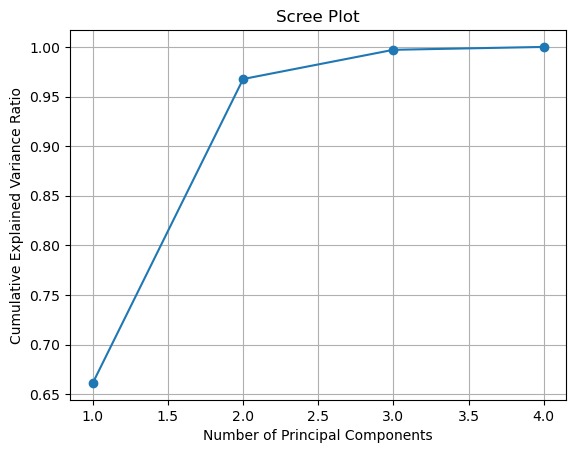

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(scaled_df)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
#Four principal components
#after applying PCA to the dataset
#four components were identified as capturing the maximum amount of variation in the data.

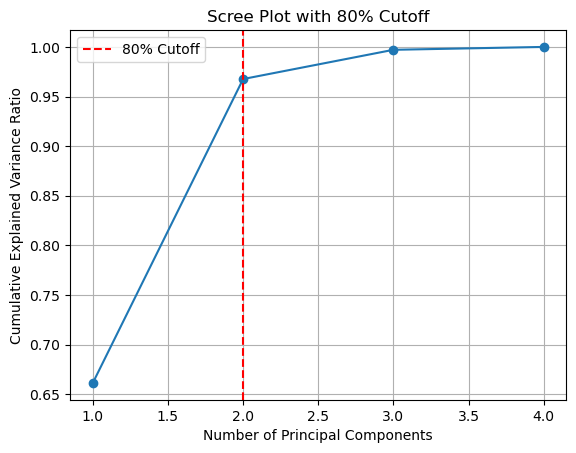

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(scaled_df)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 80% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.80) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='80% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 80% Cutoff')
plt.legend()
plt.grid(True)
plt.show()

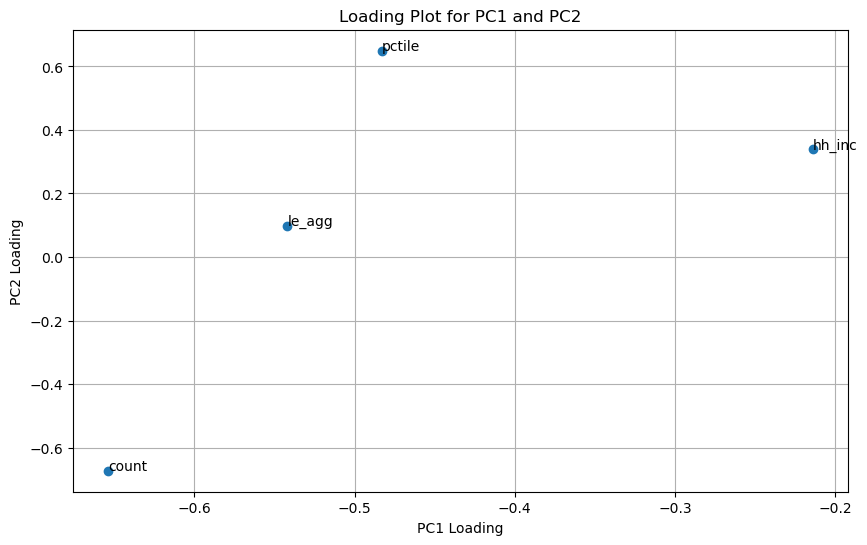

In [18]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(scaled_df)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)

# Add labels for each feature
for i, feature in enumerate(scaled_df.columns):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

plt.show()